In [29]:
import os 
import utils_plots as ut

In [ ]:
# Set directories
project_dir = '/Users/huripari/Documents/PhD/TCs_Genesis'
fs_dir = os.path.join(project_dir, 'tcg_fsM')
results_dir = os.path.join(fs_dir, 'results')
# Set basin array and basin names array
basin_names = ['North East Pacific', 'North West Pacific', 'North Atlantic', 'North Indian', 'South Indian', 'South Pacific']
basins = ['NEP', 'NWP', 'NA', 'NI', 'SI', 'SP']
# Set neural network as final model for comparison
FINAL_MODEL = 'mlp'

# Final model violin plots

In [31]:
# fmod_violin_fig = ut.final_models_violins('MSE', results_dir, basins, basin_names, 'all', 'all')

In [32]:
# fmod_violin_fig = ut.final_models_violins('MSE', results_dir, basins, basin_names, 'original', 'all')

In [33]:
# fmod_violin_fig = ut.final_models_violins('MSE', results_dir, basins, basin_names, 'deseason', 'all')

In [34]:
# fmod_violin_fig = ut.final_models_violins('MSE', results_dir, basins, basin_names, 'detrend', 'all')

# Feature selection model violin plots

In [35]:
# fs_models_fig = ut.fs_models_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'all', show_noFS=True)

In [36]:
# fs_models_fig = ut.fs_models_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'original', show_noFS=False)

In [37]:
# fs_models_fig = ut.fs_models_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'deseason', show_noFS=True)

In [38]:
# fs_models_fig = ut.fs_models_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'detrend', show_noFS=True)

# Predictors type violin plots

In [39]:
# pred_type_fig = ut.predictors_type_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'all')

In [40]:
# pred_type_fig = ut.predictors_type_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'linreg')

In [41]:
# pred_type_fig = ut.predictors_type_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'lgbm')

In [42]:
# pred_type_fig = ut.predictors_type_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'pi-lgbm')

# Number of clusters violin plots

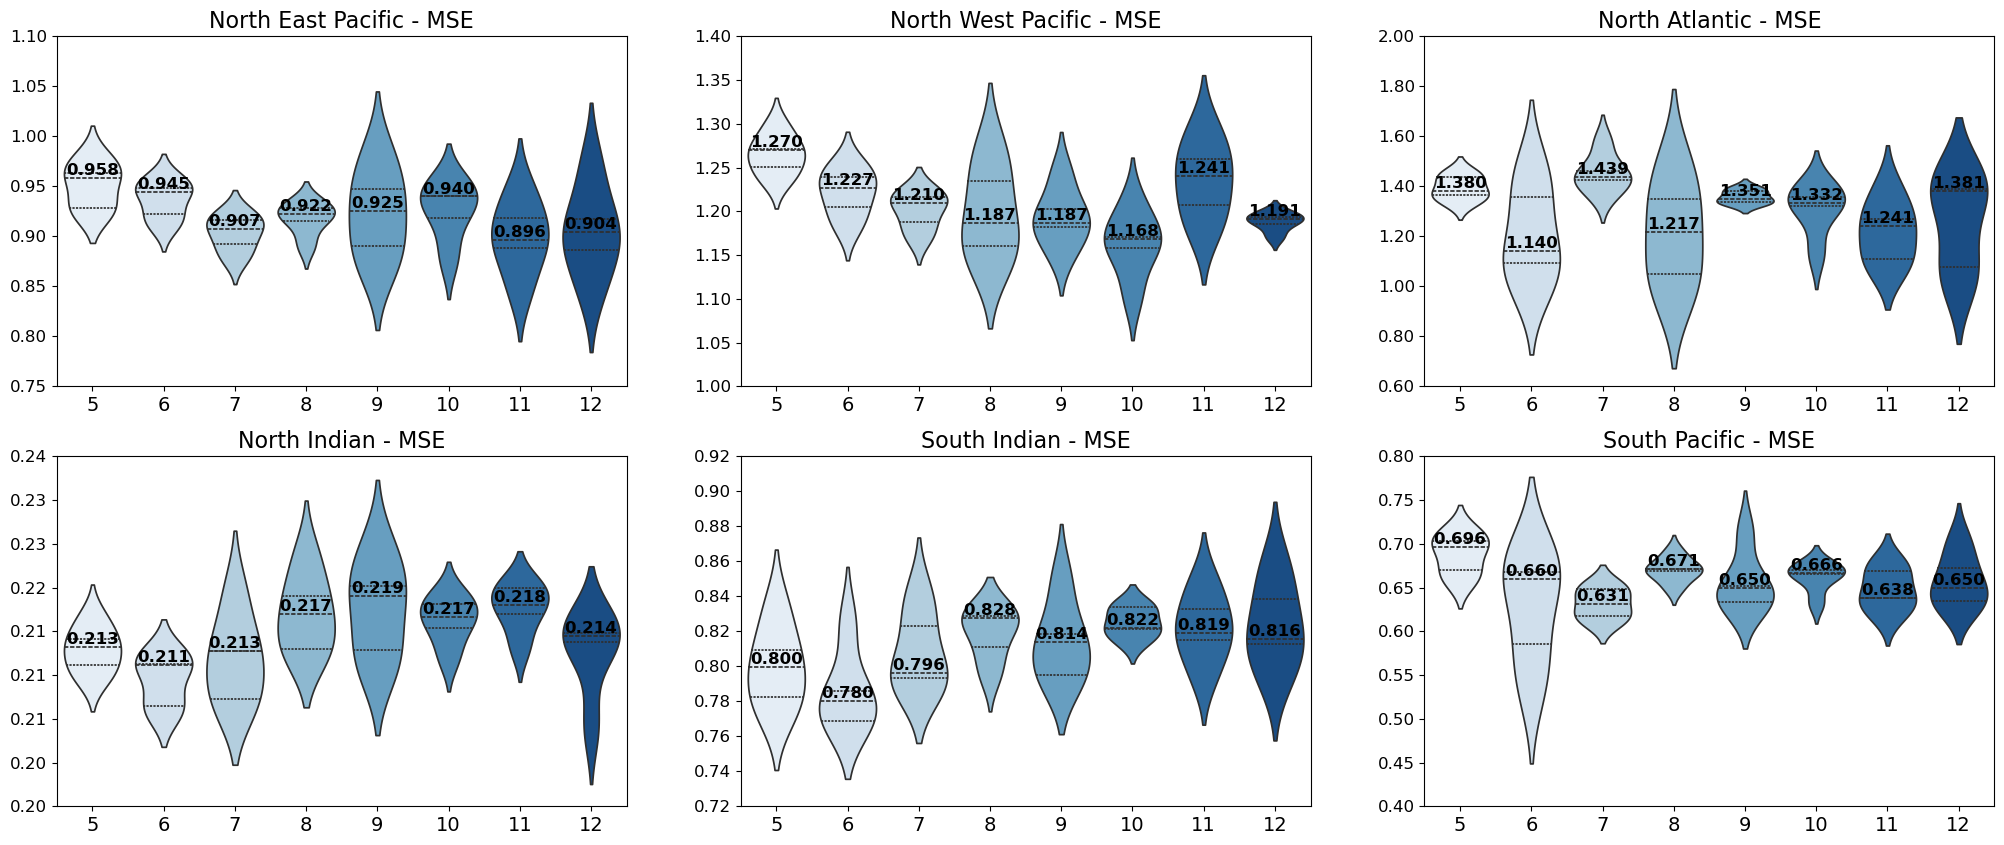

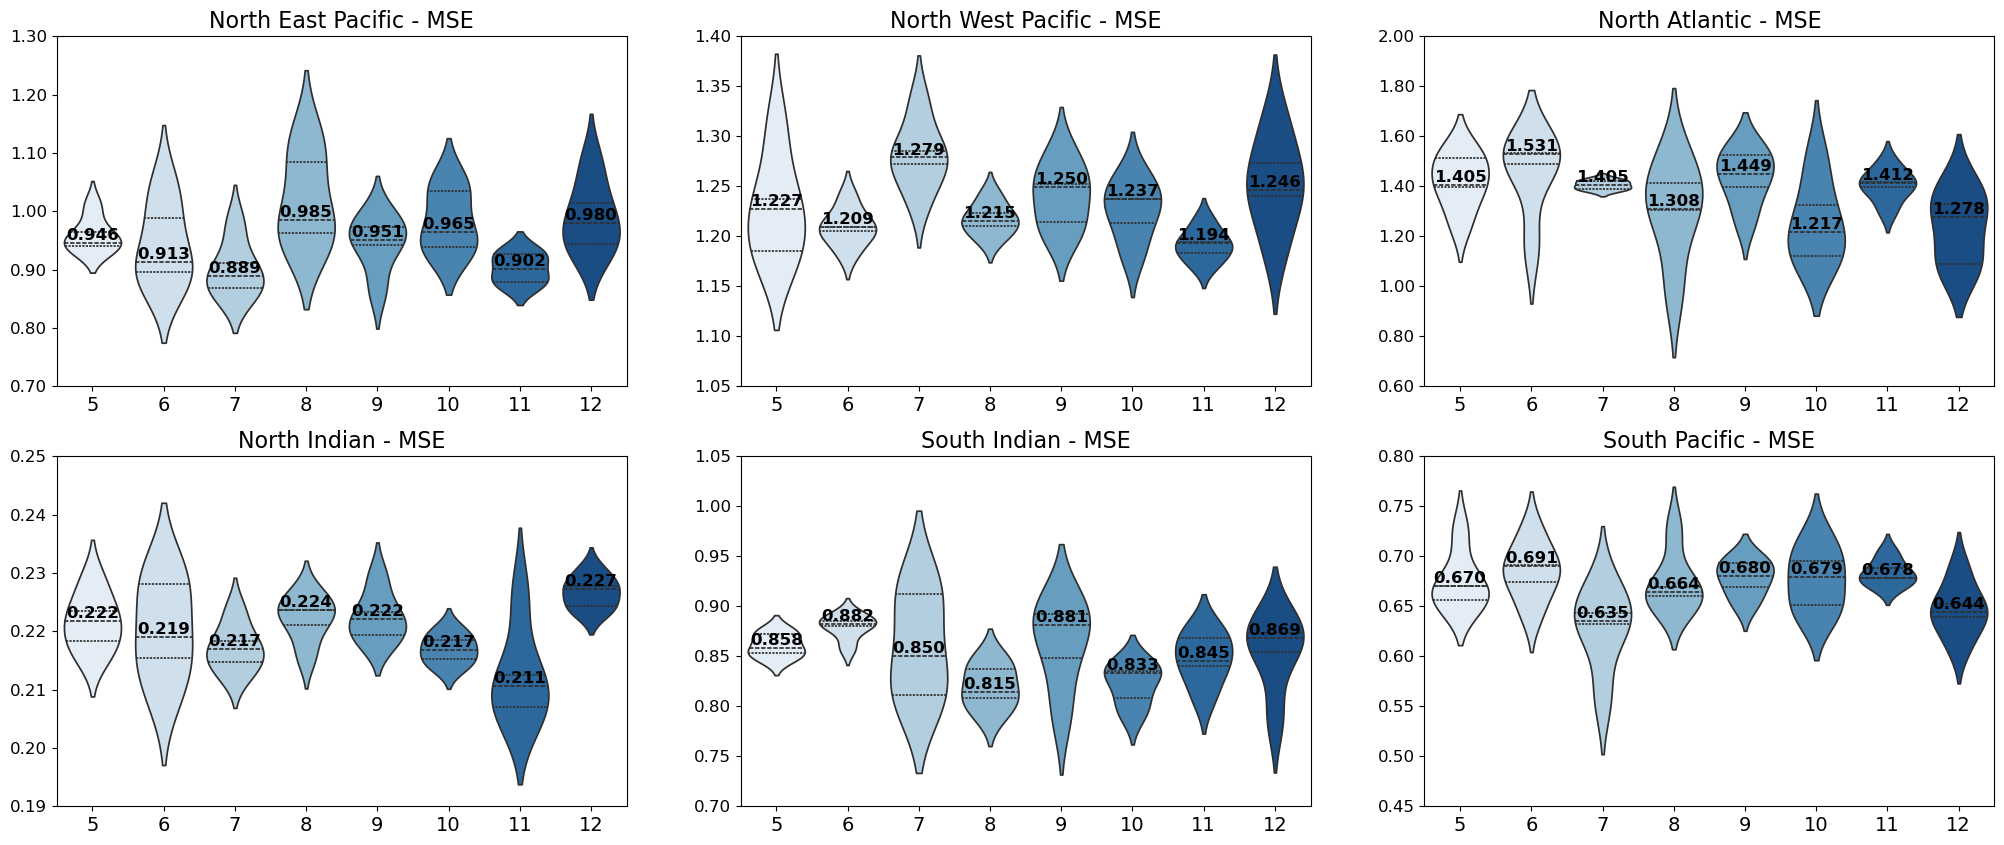

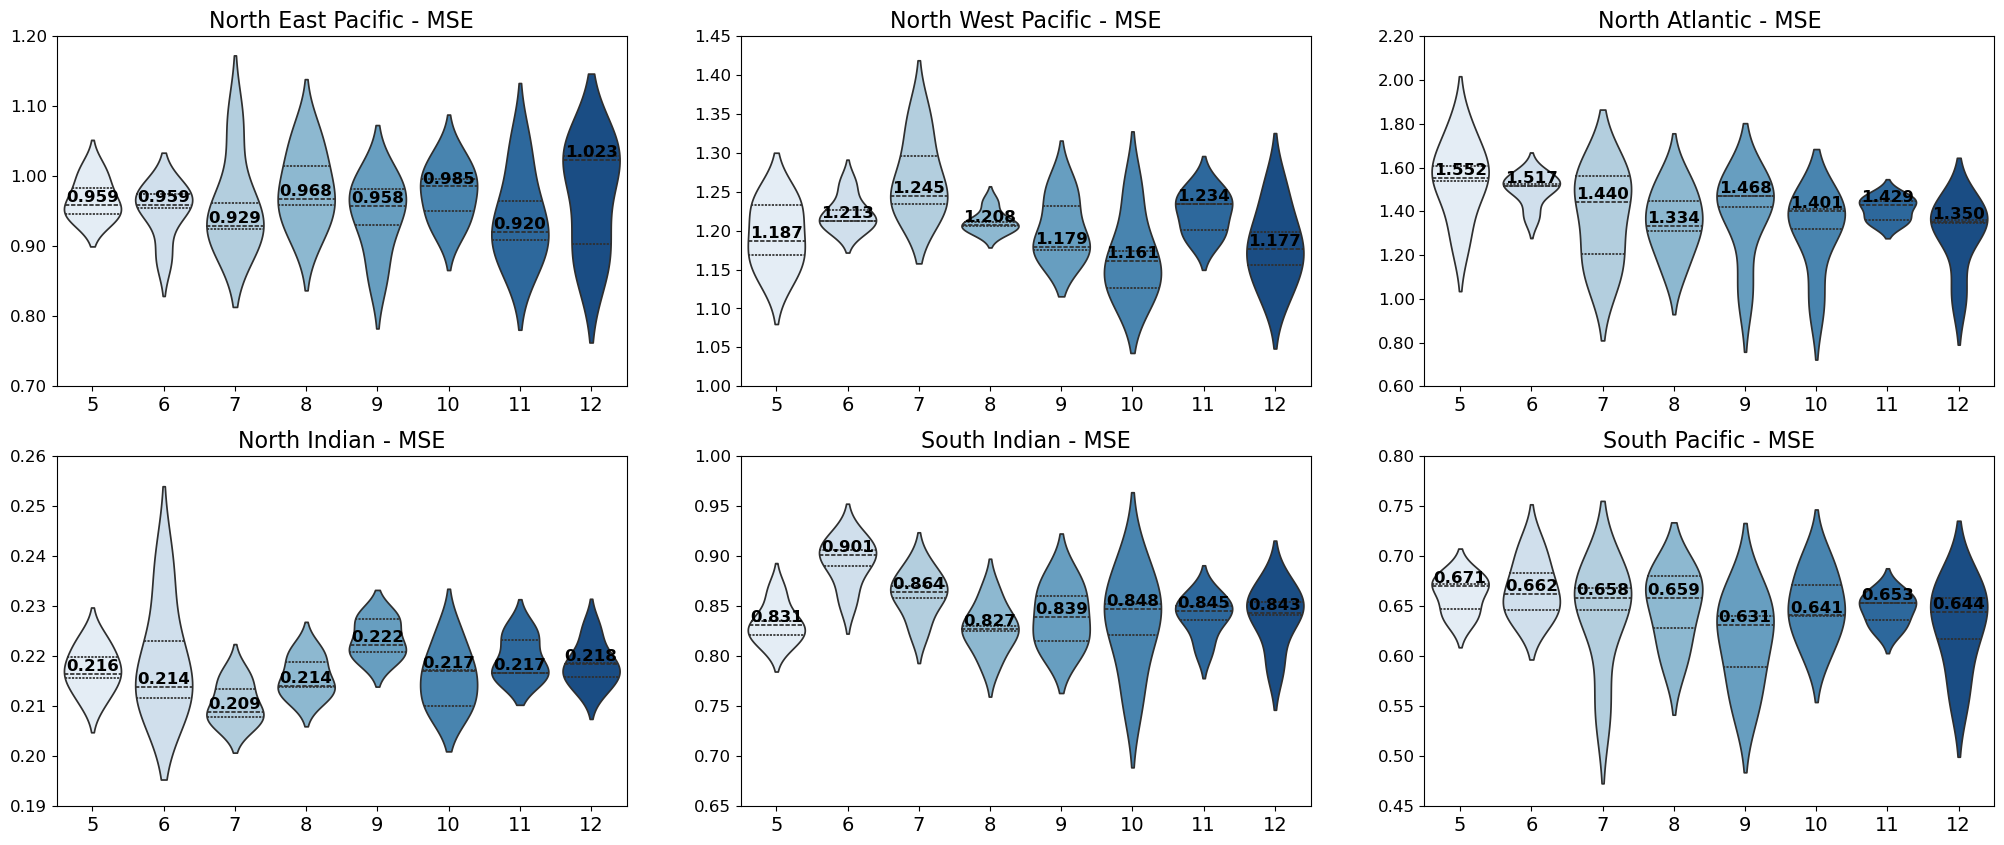

In [ ]:
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'original', 'all')
ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'original', 'linreg')
ncl_fig.savefig(os.path.join(fs_dir, 'best_model_analysis', 'figures', 'linreg_violin_plots.pdf'), format='pdf', bbox_inches='tight', dpi=300)
ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'original', 'lgbm')
ncl_fig.savefig(os.path.join(fs_dir, 'best_model_analysis', 'figures', 'lgbm_violin_plots.pdf'), format='pdf', bbox_inches='tight', dpi=300)
ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'original', 'pi-lgbm')
ncl_fig.savefig(os.path.join(fs_dir, 'best_model_analysis', 'figures', 'pi-lgbm_violin_plots.pdf'), format='pdf', bbox_inches='tight', dpi=300)

In [44]:
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'deseason', 'all')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'deseason', 'linreg')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'deseason', 'lgbm')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'deseason', 'pi-lgbm')

In [45]:
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'detrend', 'all')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'detrend', 'linreg')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'detrend', 'lgbm')
# ncl_fig = ut.n_clusters_violins('MSE', FINAL_MODEL, results_dir, basins, basin_names, 'detrend', 'pi-lgbm')

# Run configuration for each sub-basin

In [46]:
predictors_type = 'original' # 'original', 'deseason', 'detrend'

if predictors_type == 'original':
    run_config_dict = {
        # 'sub-basin': [fs_model, n_clusters]
        'NEP': ['lgbm', 7],
        'NWP': ['pi-lgbm', 10],
        'NA': ['linreg', 6],
        'NI': ['pi-lgbm', 7],
        'SI': ['linreg', 6],
        'SP': ['pi-lgbm', 9],
    }
elif predictors_type == 'deseason':
    run_config_dict = {
        # 'sub-basin': [fs_model, n_clusters]
        'NEP': ['linreg', 6],
        'NWP': ['linreg', 10],
        'NA': ['linreg', 10],
        'NI': ['linreg', 8],
        'SI': ['linreg', 8],
        'SP': ['linreg', 9],
    }
elif predictors_type == 'detrend':
    run_config_dict = {
        # 'sub-basin': [fs_model, n_clusters]
        'NEP': ['linreg', 12],
        'NWP': ['linreg', 10],
        'NA': ['linreg', 12],
        'NI': ['linreg', 11],
        'SI': ['linreg', 7],
        'SP': ['linreg', 10],
    }
else:
    raise ValueError("Invalid predictors type. Choose 'original', 'deseason', or 'detrend'.")

# Heatmap to compare variable selection across the different fs models

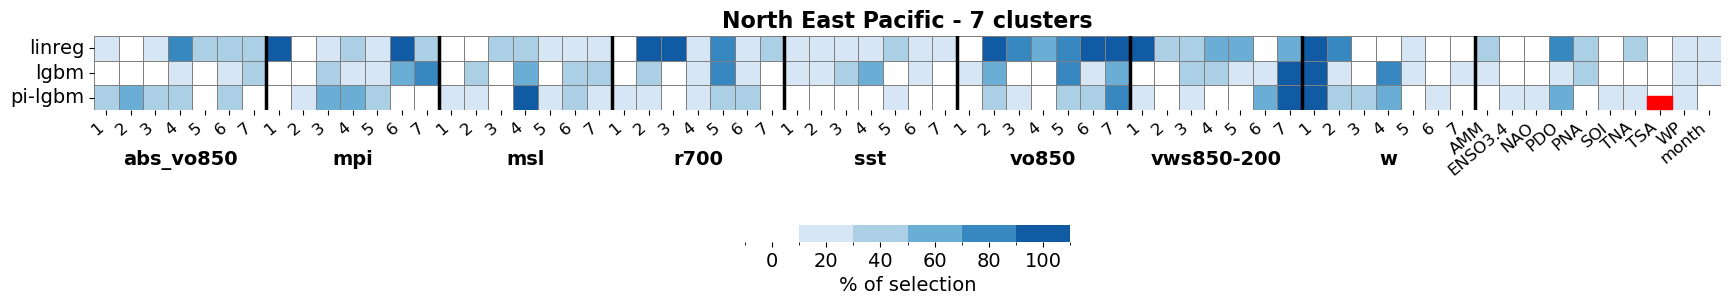

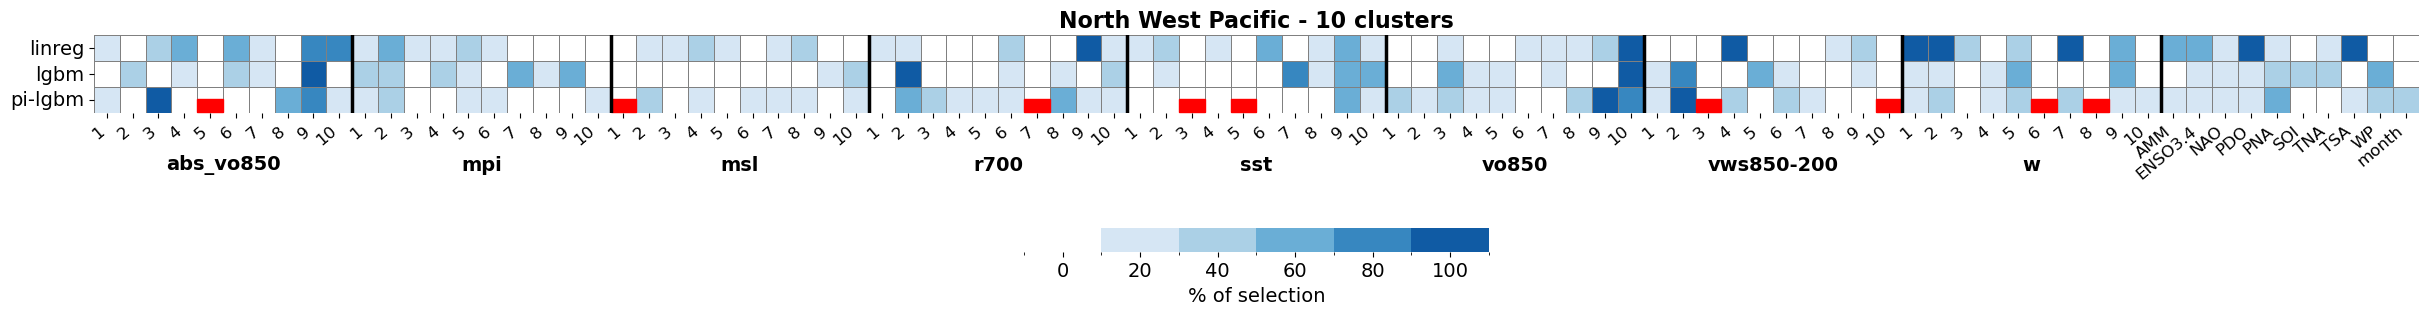

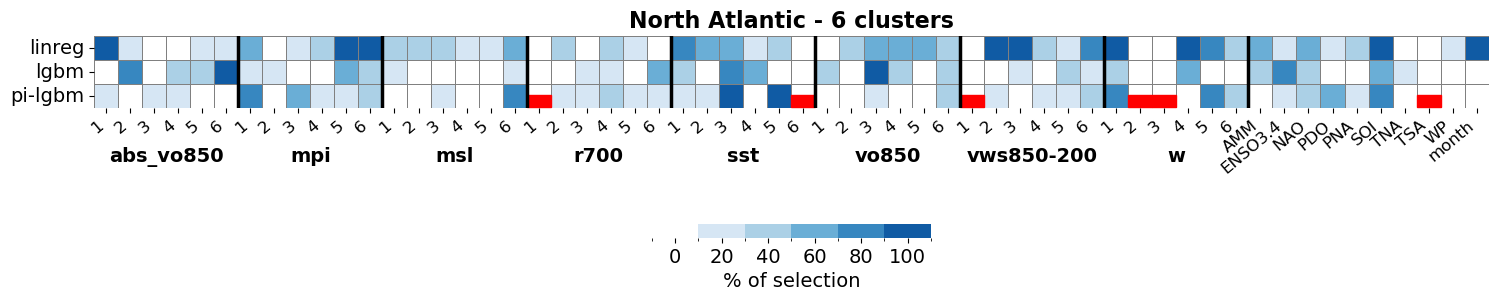

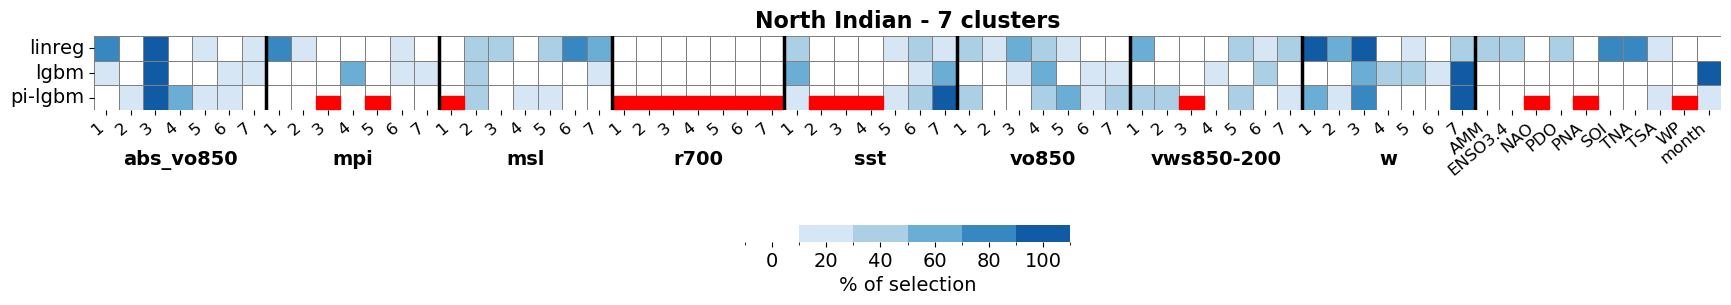

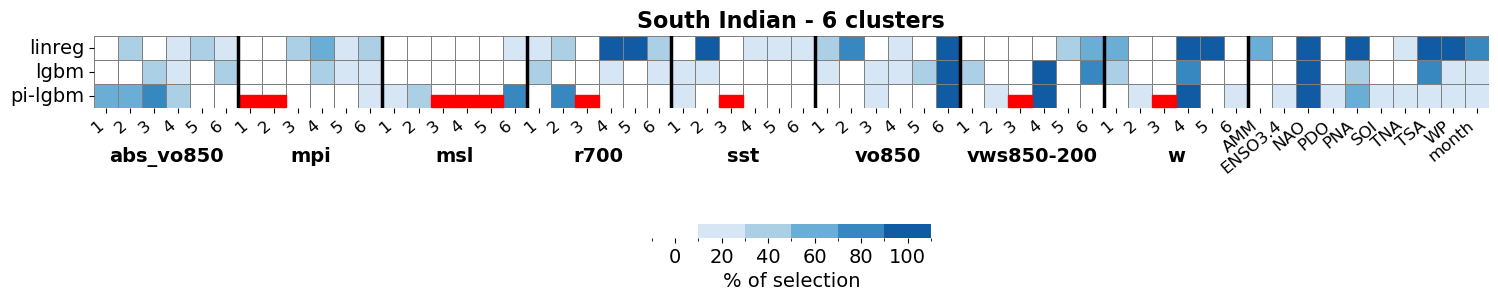

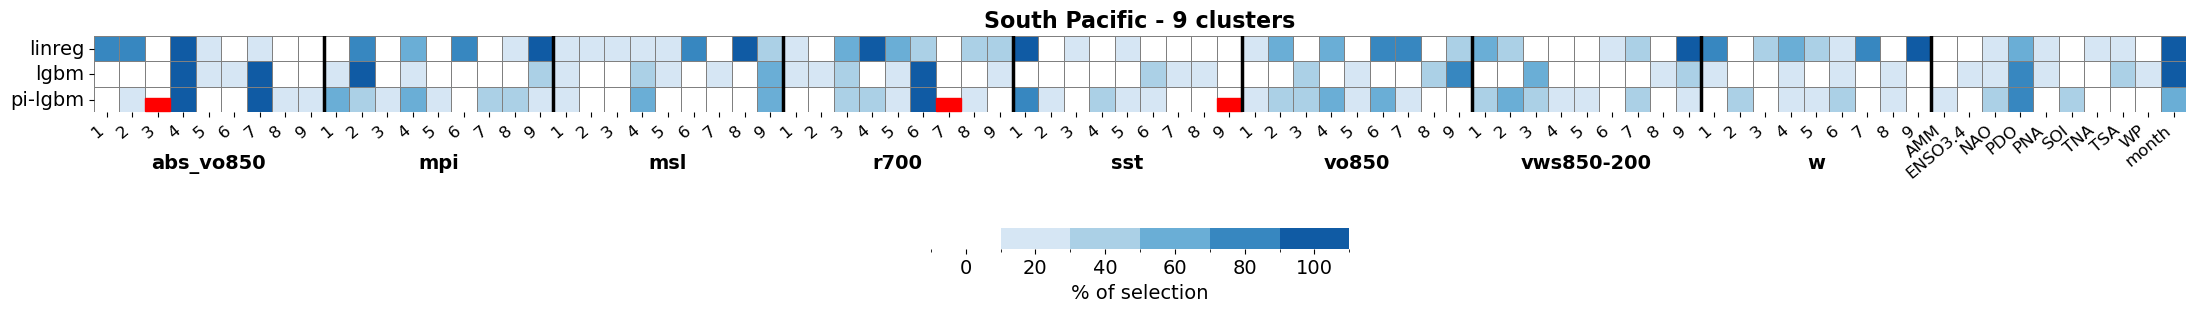

In [47]:
for basin in basins:
    basin_name = basin_names[basins.index(basin)]
    fs_model, n_clusters = run_config_dict[basin]
    ut.heatmap_var_selection_fs_models(results_dir, fs_dir, basin, basin_name, n_clusters, predictors_type)

# Heatmap to compare variable selection across 5 different tiers of model performances

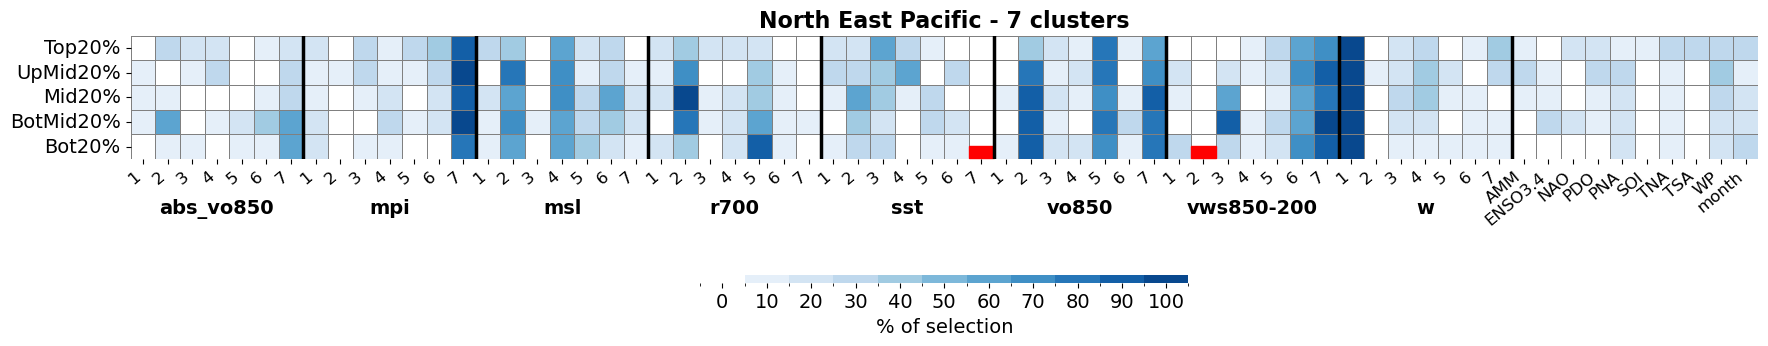

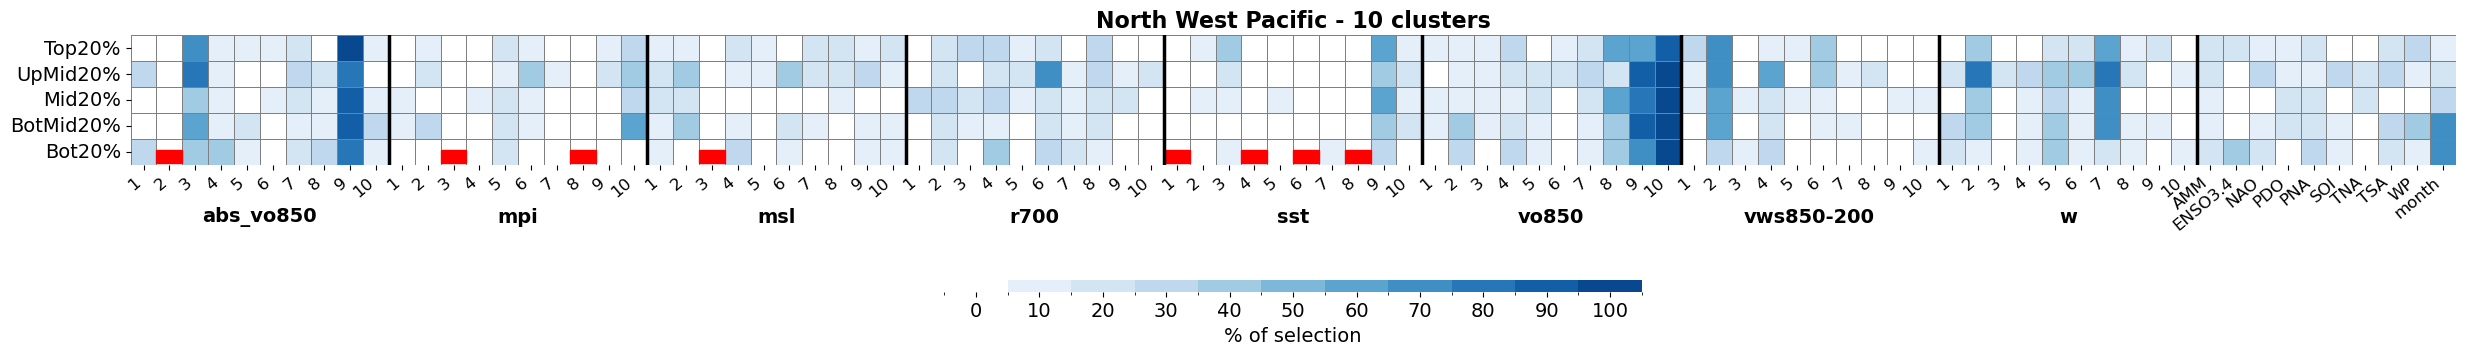

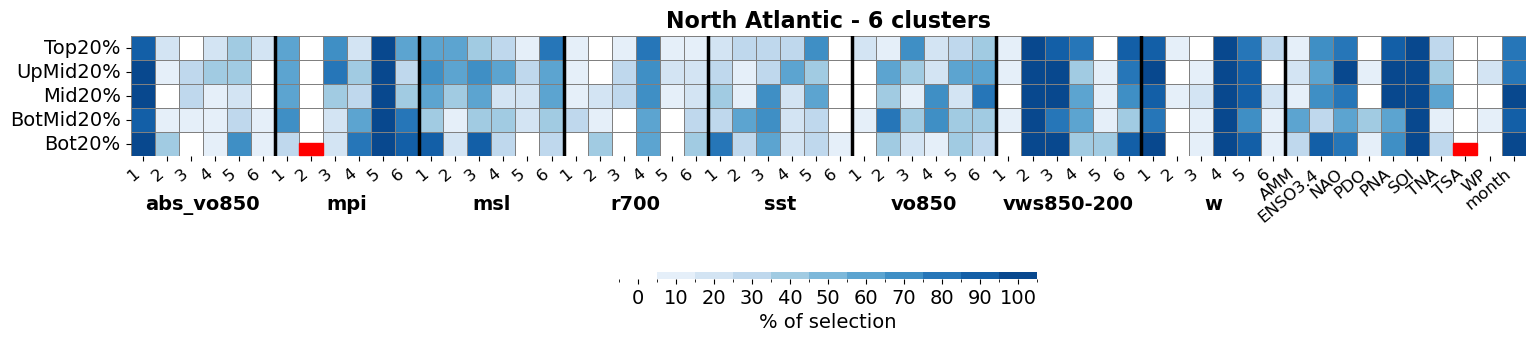

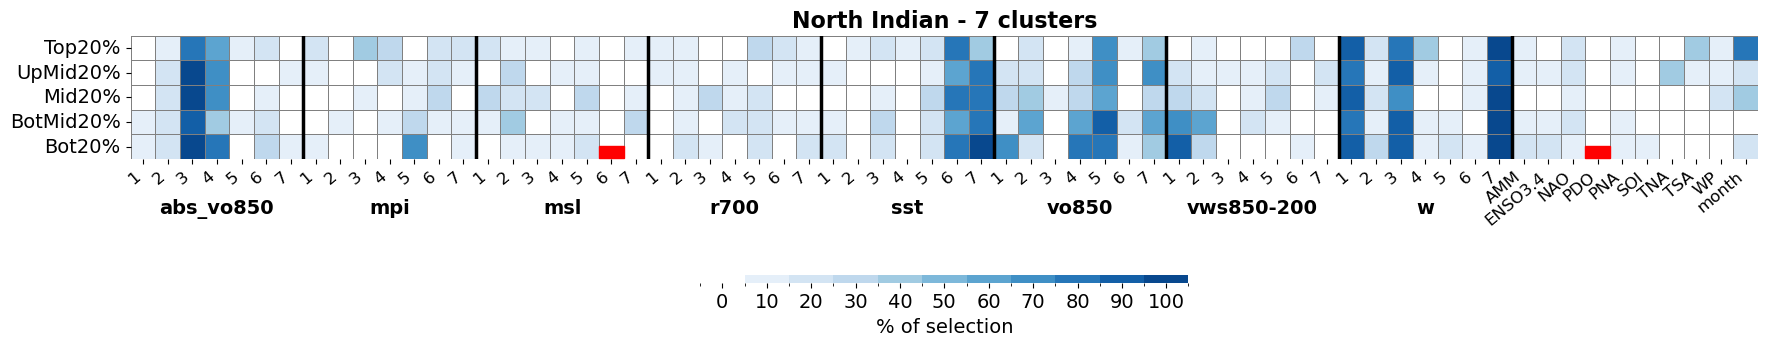

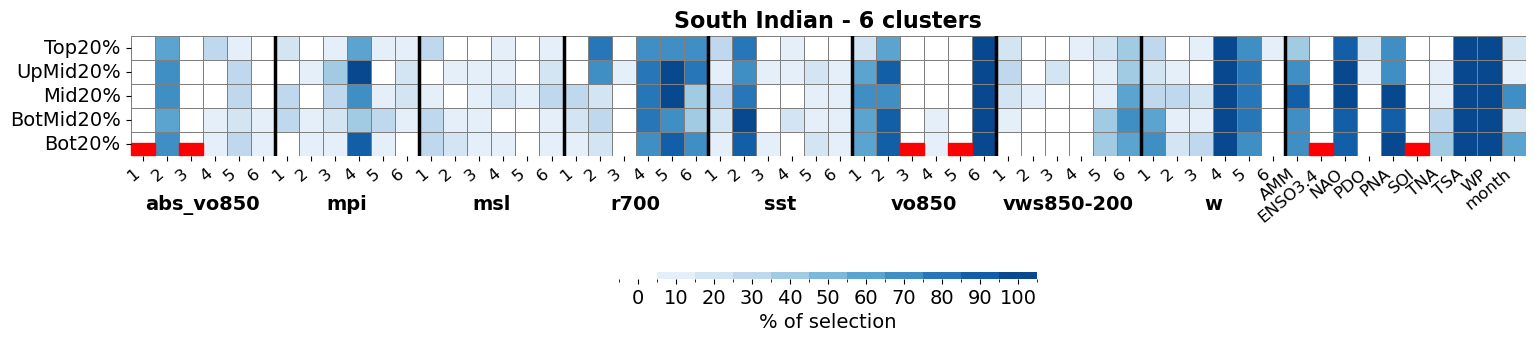

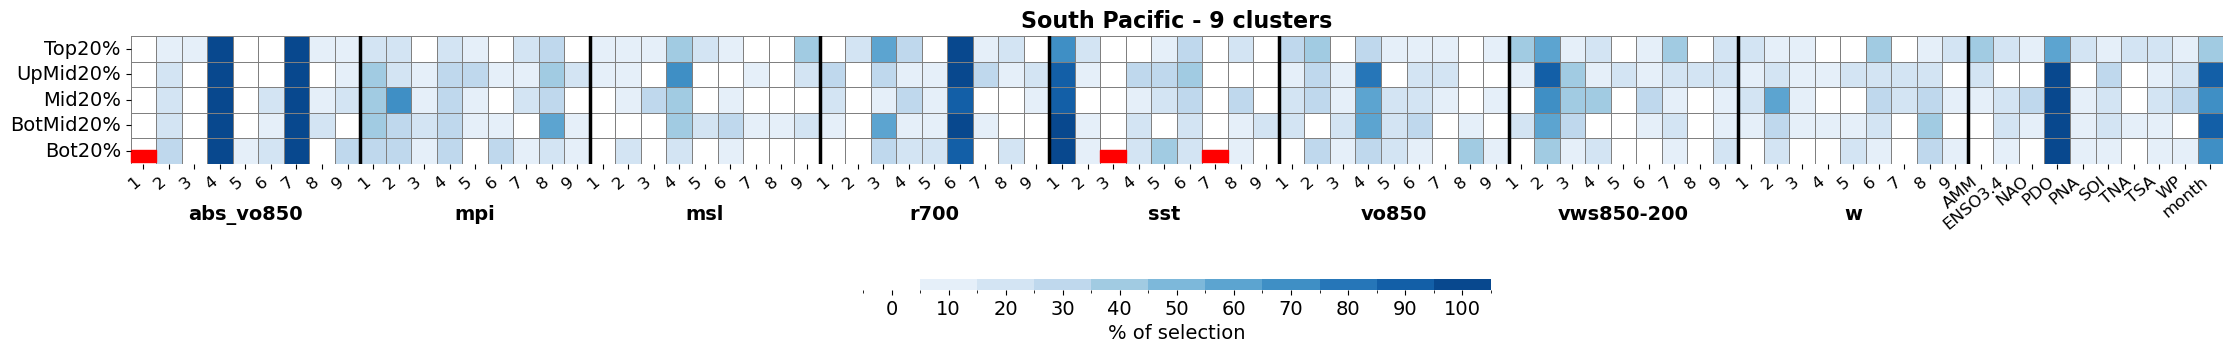

In [48]:
for basin in basins:
    basin_name = basin_names[basins.index(basin)]
    fs_model, n_clusters = run_config_dict[basin]
    ut.heatmap_var_selection_models_tiers('R_Y', FINAL_MODEL, results_dir, fs_dir, basin, basin_name, n_clusters, predictors_type, fs_model)